# Activation functions.

* The identity $I(x)=x$.
Esto y nada es lo mismo. Sirve para simular regresiones y hay redes profundas (Inception, Recursive?) que usan esta activacion.

* Heaviside (Step) function.


\begin{eqnarray}
H(x) = \left \{
    \begin{array}{cc}
        1 & \text{  si } x > 0 \\
        0 & \text{  si } x \le 0
    \end{array}
    \right .
\end{eqnarray}



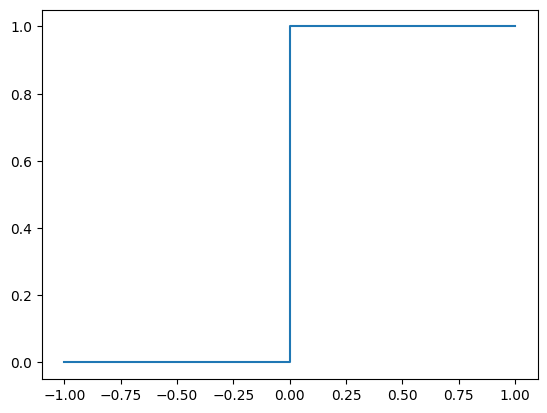

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=[-1,0,1]
y=[0,0,1]

plt.step(x,y)

## Sigmoid logistic

$$S(t) = \frac{1}{1 + \exp(-t)} .$$

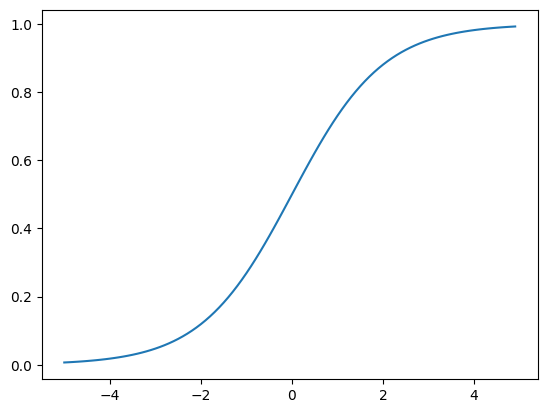

In [7]:
def S(t):
    return 1/(1 + np.exp(-t))

x = np.arange(-5, 5, 0.1)


plt.plot(x, S(x))

## Tangente hiperpolica.


$$\tanh(t) = \frac{\sinh(t)}{\cosh(t)}= \frac{\mathrm{e}^{t}-\mathrm{e}^{-t}}{\mathrm{e}^t + \mathrm{e}^{-t}} .$$

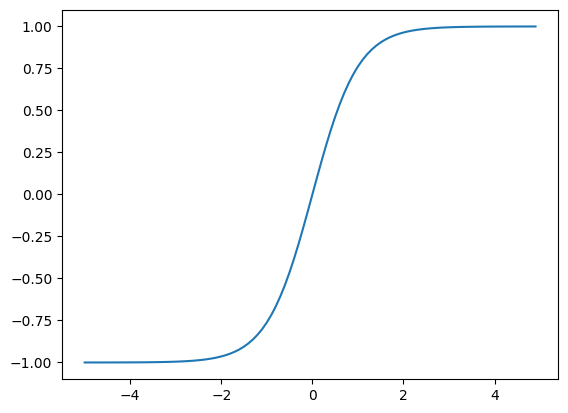

In [9]:
plt.plot(x, np.tanh(x))

## Rectified Linear Unit (ReLU)

\begin{eqnarray}
\text{ReLU} = \left \{
    \begin{array}{cc}
    0 &  \text{si   } x < 0 \\
    x & \text{si } x \ge 0
    \end{array}
    \right .
\end{eqnarray}
Es decir ReLU$(t) = H(t) t$

La ReLU tiene el probelma del "dying neuron" . La parte negativa tiene gradiente 0, y esto tampoco es bueno.

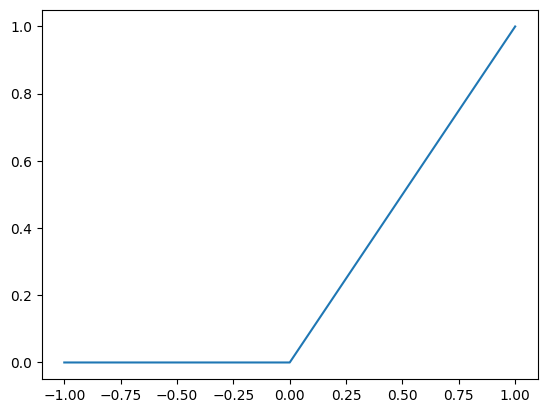

In [11]:
def ReLU(x):
    if x<0 :
        return 0
    else :
        return x


l=-1
r=1.1

x = np.arange(l, r, 0.1)

R = [ ReLU(t) for t in x]

plt.plot(x, R)

Para evitar el problema del "dying neuron" se introdujo la  Leaky ReLU.

\begin{eqnarray}
\text{Leaky ReLU}(t) = \left \{
    \begin{array}{cc}
    at & \text{ si   } t < 0 \\
    t & \text{ si   } t \ge 0 \\
    \end{array}
    \right .
\end{eqnarray}
$a>0$ pero pequenho, por ejemplo para $a=0.01$

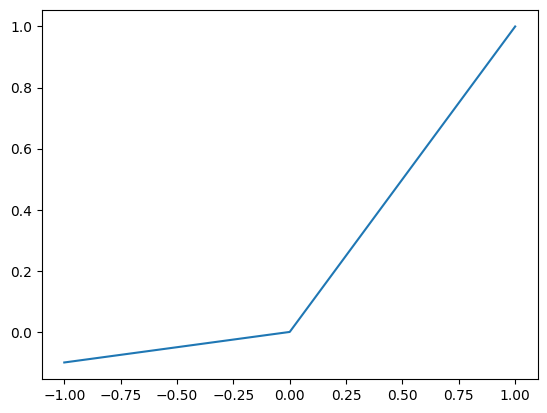

In [13]:
def LeakyReLU(x, a):
    if x<0 :
        return a*x
    else :
        return x


l=-1
r=1.1
a=0.1

x = np.arange(l, r, 0.1)

R = [ LeakyReLU(t,a) for t in x]

plt.plot(x, R)

### ELU:


\begin{eqnarray}
\text{ELU}(t) = \left \{
    \begin{array}{cc}
    \alpha ( \mathrm{e}^t - 1) & \text{ si   } t < 0 \\
    t & \text{ si   } t \ge 0 \\
    \end{array}
    \right .
\end{eqnarray}

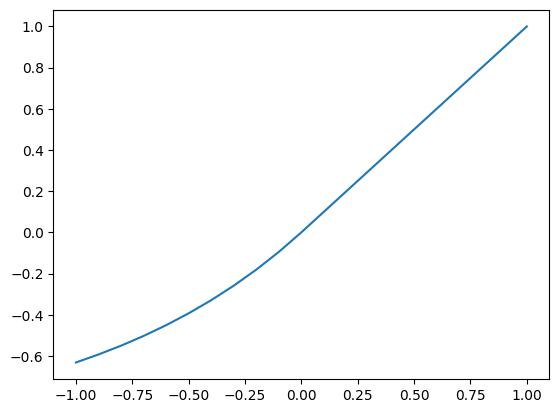

In [16]:
def ELU(t, a):
    if t<0 :
        return a*(np.exp(t)-1)
    else :
        return t


l=-1
r=1.1
a=1

x = np.arange(l, r, 0.1)

R = [ ELU(t,a) for t in x]

plt.plot(x, R)

## Softmax.
Es para multiclase.


\begin{eqnarray}
\sigma : \mathbb{R}^K &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{k=1}^K \exp(z_k)}
\end{eqnarray}

### Forward Progators (propagadores hacia adelante)

El modelo **clasico** (es un simple MLP:Multilayer-perceptron, de 3 capas)

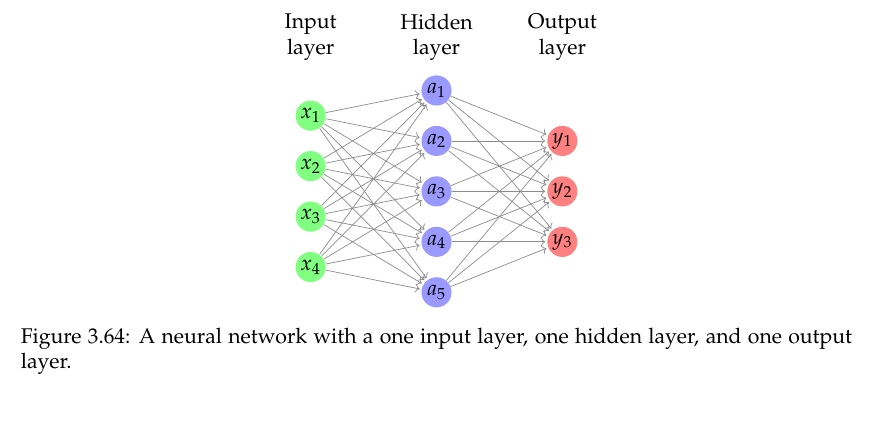

Vamos a hacer un analisis bottom-to-top.

El modelo  mas simple es 1 node de entrada, uno de salida y uno oculto.

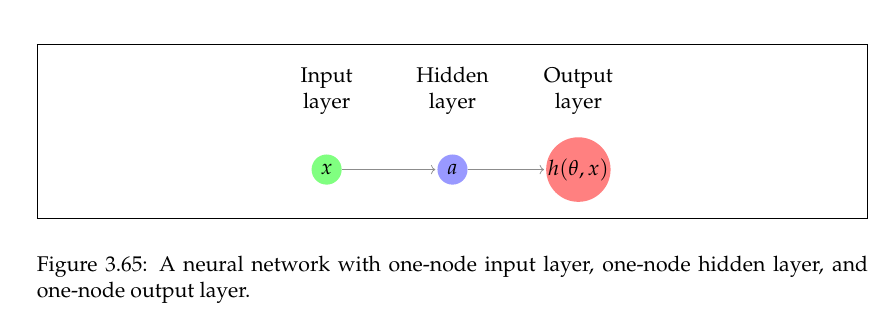

Hagamos la tabla de negacion.

| $$x$$ | $$\sum \theta_i x_i = - x $$ | $$ \ge \text{threshold} $$ | $$ \text{not  }  x$$
| ------ | ------------- | ----------------| -------------- |
| 1 | 0 | 0 | 1 |
| 1 | -1 | 0 | 0 |



Este modelo del "not" es de una sola capa, con activacion de $H(t)$.

### Propagacion en el modelo de la Figura 3.65

* Se toman los datos de entrada $x$,
* Se pesa el dato de entrada con un peso (weight), $\theta$,
escribimos

$$z^{(2)} = x \theta^{(1)} .$$
* Llega la activacion en la capa 2.

$$a^{(2)} = S(z^{(2)}) = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}}. $$

* Usamos la activacion $a^{(2)}$ y la pesamos con $\theta^{(2)}$ para obtener $z^{(3)}$. $z^{(3)}=a^{(2)} \theta^{(2)}$.

* Finalmente usamos la activacion en la capa 3 que es la **hipotesis**.

$$h(\theta,x) = S(z^{(3)}) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}}  .$$

Ahora dependiendo si el valor de la hiposis esta por encima del umbral o no, el resultado es 0 o 1.





Varios nodos de entrada, uno oculto y una de salida.

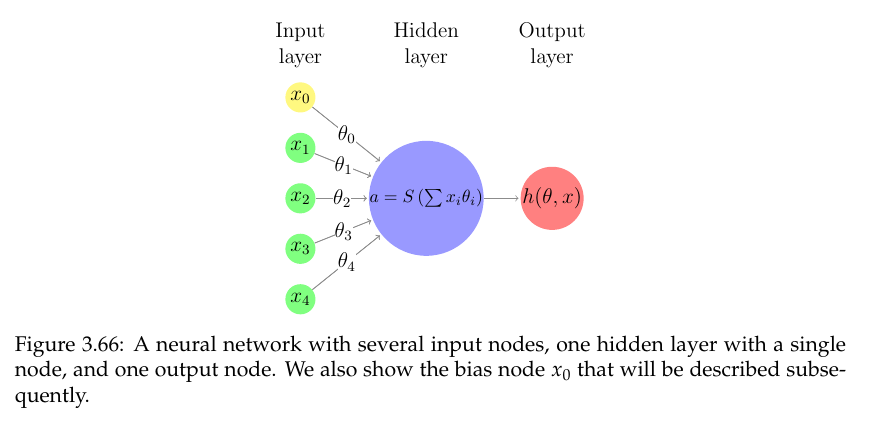


### Veamos la propagacion hacia adelante.

* Pesamos los datos de entrada con los  pesos $\theta_i$


$$z^{(2)}(\theta, x) = \theta_0 + x_1 \theta_1 + x_2 \theta_2 + x_3 \theta_3 + x_4 \theta_4 = \sum_{i=0}^4 \theta_i x_i . \tag{1}$$

* Aplicamos la activacion $a$

$$a^{(2)} = \frac{1}{1 + \mathrm{e}^{-z^{(2)}}} .$$

* Calculamos el $z^{(3)}$ como un valor pesado.


$$z^{(3)} = a^{(2)} \theta^{(2)} .$$

* Por ultimo calculamos la hipotesis.


$$h(\theta, x) = \frac{1}{1 + \mathrm{e}^{-z^{(3)}}} .$$

Con el objeto de vectorizar, podemos escribir la Ecuacion  (1)
como $z^{(2)} = \theta^T x = x^T \theta $ donde $\theta^T$ es el vector fila de pesos y $x$ es columna de entradas.

### Proxima clase, varios de entrada, varios ocultos, uno de salida.